# Projects -Cohort Analysis for assessing customer retention in E-commerce industry

## 02 - Exploratory Data Analysis (EDA) - Sales & Customer Behavior

In this notebook, we explore the dataset to better understand:

- Overall sales trends over time
- Top-selling products
- Customer activity and purchasing frequency
- Patterns in purchase behavior (quantity, price, time)

This will help us identify key insights before moving on to modeling or segmentation.

Dataset: Cleaned_Dataset_ecommerce.csv

In [11]:
# Import necessary libraries
import pandas as pd
import os

dataset_path = os.path.join("..", "dataset", "Cleaned_Dataset_ecommerce.csv")
#dataset_path = os.path.join("..", "dataset", "Cleaned_Dataset_ecommerce.pkl")

df = pd.read_csv(dataset_path)
#df = pd.read_pickle(dataset_path)

df.shape
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,TotalPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,664.95,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,1862.95,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,4796.22,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,370.95,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,1941.50,Rwanda
...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,913.25,Mozambique
406825,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,8521.10,Tunisia
406826,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,560.98,Somalia
406827,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,3592.35,Senegal


### Sales Trends

We analyze sales performance over time to identify business trends, seasonality, and growth patterns.  
This includes tracking revenue by month and visualizing key changes that inform strategic decisions.

In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,TotalPrice,Country,InvoiceMonth
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,664.95,Egypt,2010-12
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,1862.95,Mali,2010-12
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,4796.22,Mali,2010-12
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,370.95,South Africa,2010-12
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,1941.50,Rwanda,2010-12
...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,913.25,Mozambique,2011-12
406825,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,8521.10,Tunisia,2011-12
406826,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,560.98,Somalia,2011-12
406827,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,3592.35,Senegal,2011-12


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='InvoiceMonth'>

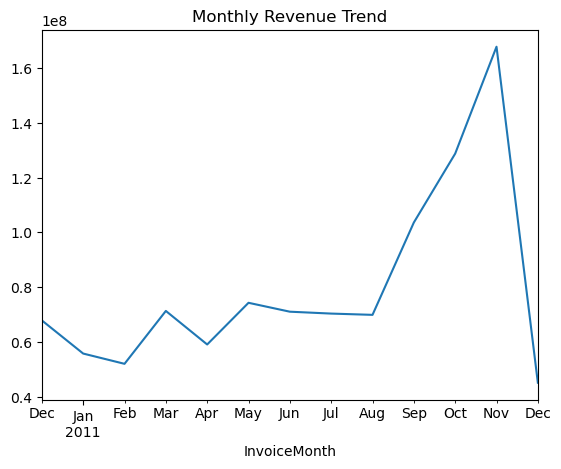

In [24]:
monthly_revenue = df.groupby('InvoiceMonth')['TotalPrice'].sum()

monthly_revenue.plot(kind='line', title='Monthly Revenue Trend')